In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,False,False,False,True,True,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,False,False,False,False,False,1150000


In [3]:
data.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [47]:
cant_ant = data.dropna(subset=['antiguedad'])
cant_ant['count'] = 1
cant_ant = cant_ant.groupby('antiguedad').agg({'count':'count'}).reset_index()
cant_ant['groups']=pd.cut(cant_ant.antiguedad,[0,10,20,30,40,50,60,80],precision = 1, include_lowest=True) 
cant_ant = cant_ant.groupby('groups').agg({'count':'sum'}).reset_index()
cant_ant

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,groups,count
0,"(-0.1, 10.0]",152117
1,"(10.0, 20.0]",30436
2,"(20.0, 30.0]",8397
3,"(30.0, 40.0]",3256
4,"(40.0, 50.0]",1818
5,"(50.0, 60.0]",308
6,"(60.0, 80.0]",113


Text(0, 0.5, 'Cantidad de propiedades publicadas')

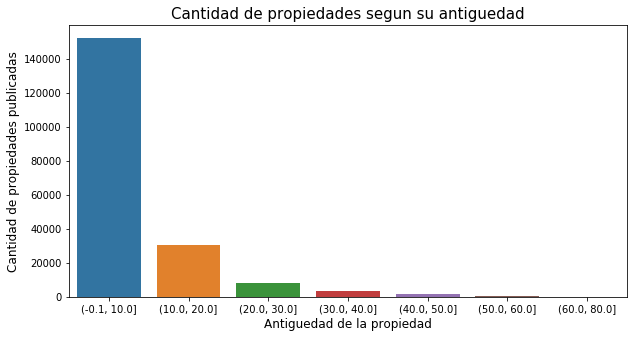

In [48]:
plt.figure(figsize = (10,5))
g = sns.barplot(x = cant_ant['groups'], y= cant_ant['count']) 
g.set_title("Cantidad de propiedades segun su antiguedad", fontsize=15)
g.set_xlabel("Antiguedad de la propiedad", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)

In [147]:
provincias_con_nuevas_prop = data.dropna(subset=["antiguedad","provincia"])[['provincia', 'antiguedad']]
provincias_con_nuevas_prop['count'] = 1
provincias_con_nuevas_prop = provincias_con_nuevas_prop.groupby(['antiguedad','provincia']).agg({'count': 'count'}).reset_index()
provincias_con_nuevas_prop = provincias_con_nuevas_prop[provincias_con_nuevas_prop['antiguedad'] == 0.0].sort_values('count', ascending = False)
provincias_con_nuevas_prop

,antiguedad,provincia,count
8,0.0,Distrito Federal,7851
10,0.0,Edo. de México,5649
21,0.0,Querétaro,5618
14,0.0,Jalisco,4895
20,0.0,Puebla,3352
30,0.0,Yucatán,2816
18,0.0,Nuevo León,2767
23,0.0,San luis Potosí,2311
16,0.0,Morelos,1766
29,0.0,Veracruz,1674


Text(0, 0.5, 'Provincia')

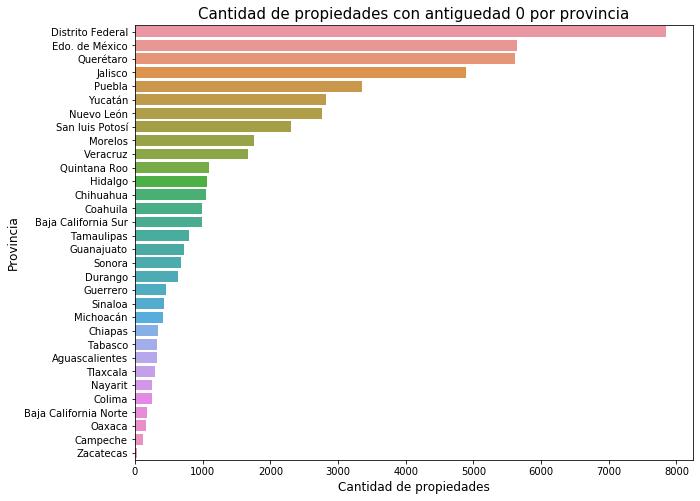

In [223]:
plt.figure(figsize = (10,8))
g = sns.barplot(x=provincias_con_nuevas_prop['count'], y=provincias_con_nuevas_prop['provincia'] )
g.set_title("Cantidad de propiedades con antiguedad 0 por provincia", fontsize=15)
g.set_xlabel("Cantidad de propiedades", fontsize=12)
g.set_ylabel("Provincia", fontsize=12)

In [46]:
df_ant = data.dropna(subset=['antiguedad'])
df_ant = df_ant[df_ant['provincia'] == "Distrito Federal"]
df_ant['count'] = 1
df_ant = df_ant.groupby('antiguedad').agg({'count':'count'}).reset_index()
df_ant['groups']=pd.cut(df_ant.antiguedad,[0,10,20,30,40,50,60,80], precision = 1, include_lowest=True)
df_ant = df_ant.groupby('groups').agg({'count':'sum'}).reset_index()
df_ant

,groups,count
0,"(-0.1, 10.0]",32414
1,"(10.0, 20.0]",12257
2,"(20.0, 30.0]",3733
3,"(30.0, 40.0]",1804
4,"(40.0, 50.0]",1215
5,"(50.0, 60.0]",242
6,"(60.0, 80.0]",84


Text(0, 0.5, 'Cantidad de propiedades')

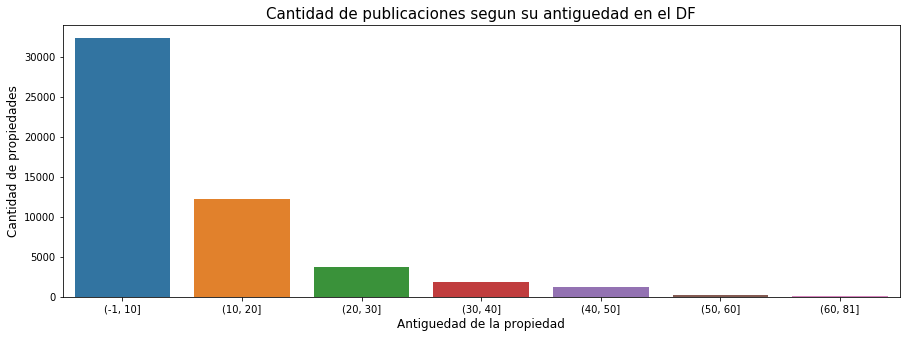

In [31]:
plt.figure(figsize = (15,5))
g = sns.barplot(x='groups', y = 'count', data = df_ant)
g.set_title("Cantidad de publicaciones segun su antiguedad en el DF", fontsize=15)
g.set_xlabel("Antiguedad de la propiedad", fontsize=12)
g.set_ylabel("Cantidad de propiedades", fontsize=12)

In [66]:
ant_metros_totales = data.dropna(subset=['antiguedad','metrostotales'])[['antiguedad', 'metrostotales']]
ant_metros_totales['groups']=pd.cut(ant_metros_totales.antiguedad,[0,10,20,30,40,50,60,80], precision = 1, include_lowest=True)
ant_metros_totales

,antiguedad,metrostotales,groups
1,10.0,180.0,"(-0.1, 10.0]"
2,5.0,166.0,"(-0.1, 10.0]"
3,1.0,67.0,"(-0.1, 10.0]"
4,10.0,95.0,"(-0.1, 10.0]"
5,5.0,90.0,"(-0.1, 10.0]"
...,...,...,...
239993,1.0,150.0,"(-0.1, 10.0]"
239994,3.0,90.0,"(-0.1, 10.0]"
239996,0.0,250.0,"(-0.1, 10.0]"
239997,20.0,138.0,"(10.0, 20.0]"


Text(0, 0.5, 'Metros totales')

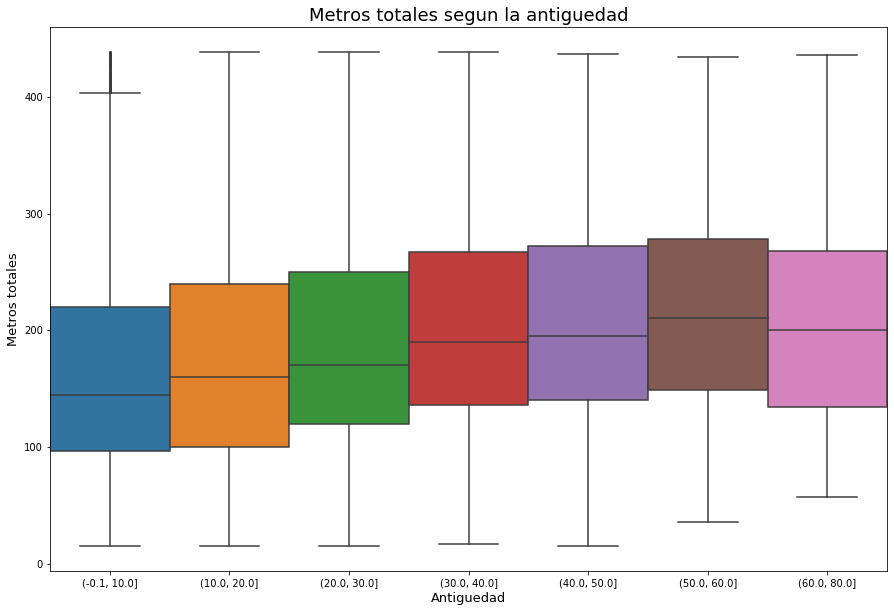

In [67]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = ant_metros_totales['groups'], y=ant_metros_totales['metrostotales'], width=1, fliersize =1)
ax.set_title("Metros totales segun la antiguedad", fontsize=18)
ax.set_xlabel("Antiguedad", fontsize=13)
ax.set_ylabel("Metros totales", fontsize=13)

In [136]:
ant_tipo = data.dropna(subset=['tipodepropiedad','antiguedad'])[['tipodepropiedad', 'antiguedad']]
ant_tipo['count'] = 1
ant_tipo['groups'] = pd.cut(ant_tipo.antiguedad, [0,10,20,30,40,50,60,80], precision = 1, include_lowest=True)
ant_tipo = ant_tipo.drop(columns='antiguedad').rename(columns={'groups':'antiguedad'}).pivot_table(index='tipodepropiedad', columns='antiguedad', values='count', aggfunc='count')
ant_tipo.head()

antiguedad,"(-0.1, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]","(60.0, 80.0]"
tipodepropiedad,,,,,,,
Apartamento,37114.0,7755.0,2046.0,827.0,450.0,81.0,17.0
Bodega comercial,805.0,248.0,52.0,15.0,7.0,1.0,1.0
Casa,91442.0,18777.0,5332.0,2089.0,1122.0,186.0,78.0
Casa en condominio,13747.0,1916.0,505.0,96.0,17.0,4.0,1.0
Casa uso de suelo,256.0,213.0,57.0,38.0,43.0,7.0,2.0


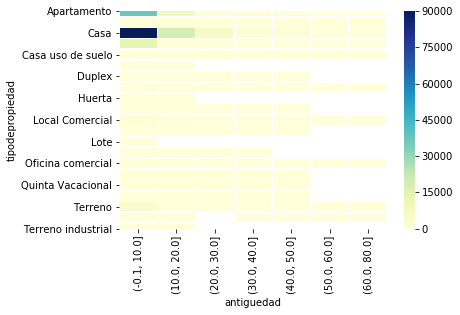

In [137]:
g = sns.heatmap(ant_tipo, vmin = 0, vmax=90000, cmap= "YlGnBu", linewidths=.5)

In [68]:
plt.figure(figsize=(40,10))
ax = sns.violinplot(x = ant_tipo['tipodepropiedad'], y= ant_tipo['antiguedad'])
plt.xticks(rotation=75)

NameError: name 'ant_tipo' is not defined

<Figure size 2880x720 with 0 Axes>

In [104]:
ant_habitaciones = data[['antiguedad', 'habitaciones']]
ant_habitaciones = ant_habitaciones.dropna()

In [105]:
ant_habitaciones.head()

,antiguedad,habitaciones
1,10.0,3.0
2,5.0,3.0
3,1.0,2.0
4,10.0,2.0
5,5.0,2.0


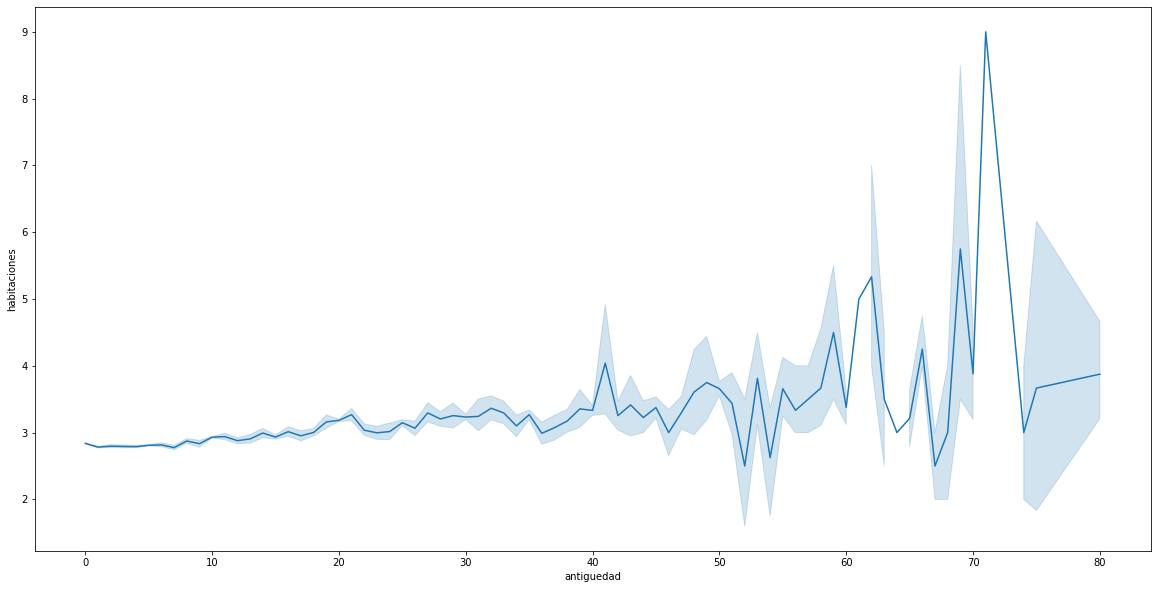

In [109]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x= 'antiguedad', y='habitaciones', data= ant_habitaciones)